<a href="https://colab.research.google.com/github/y001003/system_quality_project/blob/main/notebooks/system_quality_PYS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시스템 품질 변화로 인한 사용자 불편 예지 AI 경진대회
다양한 장비/서비스에서 일어나는 시스템 데이터를 통해 사용자의 불편을 예지하기 위해 ‘시스템 데이터’와 ‘사용자 불편 발생 데이터’를 분석하여 불편을 느낀 사용자와 불편 요인들을 찾아주세요.

# 1. 데이터 및 라이브러리 불러오기

## 1_1 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
url1 = '/content/drive/MyDrive/project/system_quality_customer_complain_data/train_err_data.csv'
url2 = '/content/drive/MyDrive/project/system_quality_customer_complain_data/train_problem_data.csv'
url3 = '/content/drive/MyDrive/project/system_quality_customer_complain_data/train_quality_data.csv'
url4 = '/content/drive/MyDrive/project/system_quality_customer_complain_data/test_err_data.csv'
url5 = '/content/drive/MyDrive/project/system_quality_customer_complain_data/test_quality_data.csv'
url6 = '/content/drive/MyDrive/project/system_quality_customer_complain_data/sample_submission.csv'
data1 = pd.read_csv(url1)
data2 = pd.read_csv(url2)
data3 = pd.read_csv(url3)
data4 = pd.read_csv(url4)
data5 = pd.read_csv(url5)
data6 = pd.read_csv(url6)
train_err_data = pd.DataFrame(data1)
train_problem_data = pd.DataFrame(data2)
train_quality_data = pd.DataFrame(data3)
test_err_data = pd.DataFrame(data4)
test_quality_data = pd.DataFrame(data5)
sample_submission = pd.DataFrame(data6)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
train_err_data

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,20201101025616,model_3,05.15.2138,15,1
1,10000,20201101030309,model_3,05.15.2138,12,1
2,10000,20201101030309,model_3,05.15.2138,11,1
3,10000,20201101050514,model_3,05.15.2138,16,1
4,10000,20201101050515,model_3,05.15.2138,4,0
...,...,...,...,...,...,...
16554658,24999,20201130163051,model_3,05.15.2138,15,1
16554659,24999,20201130172625,model_3,05.15.2138,16,1
16554660,24999,20201130172625,model_3,05.15.2138,4,0
16554661,24999,20201130172631,model_3,05.15.2138,4,0


In [5]:
train_problem_data

,user_id,time
0,19224,20201102200000
1,23664,20201116140000
2,15166,20201114130000
3,12590,20201108210000
4,15932,20201103210000
...,...,...
5424,20167,20201125120000
5425,16270,20201110120000
5426,19114,20201106230000
5427,21505,20201104110000


In [6]:
train_quality_data

,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
1,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
2,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
3,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
4,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828619,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,1,0,0,0,0,17,0,0
828620,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,0,0,0,0,0,17,0,0
828621,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,3,0,0,0,0,17,0,0
828622,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,0,0,0,0,0,17,0,0


In [7]:
test_err_data

,user_id,time,model_nm,fwver,errtype,errcode
0,30000,20201101030227,model_1,04.16.3553,31,1
1,30000,20201101030227,model_1,04.16.3553,33,2
2,30000,20201101030228,model_1,04.16.3553,15,1
3,30000,20201101030256,model_1,04.16.3553,22,1
4,30000,20201101030300,model_1,04.16.3553,11,1
...,...,...,...,...,...,...
16532643,44998,20201130210050,model_1,04.16.3553,40,0
16532644,44998,20201130211831,model_1,04.16.3553,31,1
16532645,44998,20201130211832,model_1,04.16.3553,15,1
16532646,44998,20201130212259,model_1,04.16.3553,16,1


In [8]:
test_quality_data

,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,20201128195000,30000,04.33.1261,0.0,0,0.0,0,0,0,0,5,0,0,2,0,0
1,20201128195000,30000,04.33.1261,0.0,0,0.0,0,0,0,0,5,0,0,2,0,0
2,20201128195000,30000,04.33.1261,0.0,0,0.0,0,0,0,0,5,0,0,2,0,0
3,20201128195000,30000,04.33.1261,0.0,0,0.0,0,0,0,0,5,0,0,2,0,0
4,20201128195000,30000,04.33.1261,0.0,0,0.0,0,0,0,0,5,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747967,20201125180000,44997,04.22.1750,0.0,0,0.0,0,0,2,0,0,0,0,3,0,0
747968,20201125180000,44997,04.22.1750,0.0,0,0.0,0,0,0,0,0,0,0,3,0,0
747969,20201125180000,44997,04.22.1750,0.0,0,0.0,0,0,0,0,0,0,0,3,0,0
747970,20201125180000,44997,04.22.1750,0.0,0,0.0,0,0,0,0,0,0,0,3,0,0


In [9]:
sample_submission

,user_id,problem
0,30000,0
1,30001,0
2,30002,0
3,30003,0
4,30004,0
...,...,...
14994,44994,0
14995,44995,0
14996,44996,0
14997,44997,0


## 1_2 Column별 설명

### 1_2_1 err_data

* `Err Data`는 사람들이 에러를 접한 시간을 기준으로  
  <u><b>어떤 Model</b> & <b>Fwver을 사용</b>하고, <b>접한 Errtype</b> & <b>Errcode는 무엇인지</b></u>에 대하여 알려주는 데이터이다.
  * 변수는 총 6개이고, 관측치는 약 1600만개로 User ID별로 시계열 데이터가 나와있는 자료이다.  

|Column|Description|dtype|
|---|---|---|
|user_id|사용자 고유 ID|int64|
|time|에러 발생 시간|int64|
|model_nm|에러가 발생한 모델명|object|
|fwver|에러가 발생한 펌웨어 버전|object|
|errtype|에러 분류 (에러 타입)|int64|
|errcode|어떤 에러가 발생하였는지 (에러 코드)|object|

In [11]:
train_err_data.head()

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,20201101025616,model_3,05.15.2138,15,1
1,10000,20201101030309,model_3,05.15.2138,12,1
2,10000,20201101030309,model_3,05.15.2138,11,1
3,10000,20201101050514,model_3,05.15.2138,16,1
4,10000,20201101050515,model_3,05.15.2138,4,0


### 1_2_2 quality data

* `Quality Data`는 사용자의 시스템 작동 중 문제가 발생하면  
  측정 가능한 지표들로 <b><u>해당 시점으로부터 2시간 단위로 수집한 정보</u></b>를 알려주는 데이터이다.

|Column|Description|dtype|
|---|---|---|
|time|퀄리티 데이터가 수집된 시간|int64|
|user_id|사용자 고유 ID|int64|
|fwver|퀄리티 데이터가 수집되었을때 펌웨어 버전|object|
|quality|에에러 퀄리티 수치 (0~12, 총 13개 컬럼)|int64&object|


In [13]:
train_quality_data.head()

,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
1,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
2,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
3,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
4,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0


In [12]:
train_quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828624 entries, 0 to 828623
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time        828624 non-null  int64  
 1   user_id     828624 non-null  int64  
 2   fwver       788544 non-null  object 
 3   quality_0   684192 non-null  float64
 4   quality_1   828624 non-null  int64  
 5   quality_2   788511 non-null  float64
 6   quality_3   828624 non-null  int64  
 7   quality_4   828624 non-null  int64  
 8   quality_5   828604 non-null  object 
 9   quality_6   828624 non-null  int64  
 10  quality_7   828624 non-null  object 
 11  quality_8   828624 non-null  object 
 12  quality_9   828624 non-null  object 
 13  quality_10  828624 non-null  object 
 14  quality_11  828624 non-null  int64  
 15  quality_12  828624 non-null  int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 101.2+ MB


### 1_2_3 problem data

* `Problem Data`는 전체 사용자 중에서, <b>불만을 제기한 사람들의 시간</b>을 알려주는 데이터이다.
    * User ID : 불만을 제기한 유저
    * Time : 불만을 제기한 시간
    * <u>한 사용자가 여러번 불만을 제기할 수 있음</u>

|Column|Description|dtype|
|---|---|---|
|user_id|사용자 고유 ID|int64|
|time|불만을 제기한 시간|int64|

In [15]:
train_problem_data.head()

,user_id,time
0,19224,20201102200000
1,23664,20201116140000
2,15166,20201114130000
3,12590,20201108210000
4,15932,20201103210000


In [14]:
train_problem_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  5429 non-null   int64
 1   time     5429 non-null   int64
dtypes: int64(2)
memory usage: 85.0 KB


# 2. Data Preprocessing

## 2_1 결측치 처리


### 2_1_1 train_quality data 결측치

In [16]:
train_quality_data.isnull().sum()

time               0
user_id            0
fwver          40080
quality_0     144432
quality_1          0
quality_2      40113
quality_3          0
quality_4          0
quality_5         20
quality_6          0
quality_7          0
quality_8          0
quality_9          0
quality_10         0
quality_11         0
quality_12         0
dtype: int64

> fwver 펌웨어 NaN값을 가진 경우 quality_0과 quality_2 또한 NaN 값을 가졌다.

In [54]:
train_quality_data[(train_quality_data['fwver'].isnull()) & (train_quality_data['quality_0'].isnull()) & (train_quality_data['quality_2'].isnull())]

,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
38316,20201120010000,10693,NaN,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0
38317,20201120010000,10693,NaN,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0
38318,20201120010000,10693,NaN,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0
38319,20201120010000,10693,NaN,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0
38320,20201120010000,10693,NaN,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828331,20201109232000,24982,NaN,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0
828332,20201109232000,24982,NaN,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0
828333,20201109232000,24982,NaN,NaN,-1,NaN,0,0,-1,-1,0,0,0,0,-1,0
828334,20201109232000,24982,NaN,NaN,-1,NaN,0,0,-1,-1,0,0,0,0,-1,0


In [56]:
train_quality_data['time'].value_counts()

20201110143000    948
20201110150000    876
20201110144000    864
20201110145000    828
20201110142000    828
                 ... 
20201123054000     12
20201113061000     12
20201126035000     12
20201103041000     12
20201108041000     12
Name: time, Length: 4319, dtype: int64

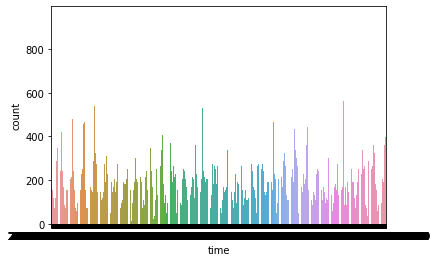

In [58]:
sns.countplot(x='time',data=train_quality_data)

In [60]:
train_quality_data['time'].value_counts().mean()

191.8555221115999

In [81]:
train_quality_data['time'].value_counts()[train_quality_data['time'].value_counts() > 800].index

Int64Index([20201110143000, 20201110150000, 20201110144000, 20201110145000,
            20201110142000, 20201108230000, 20201110141000],
           dtype='int64')

In [83]:
train_quality_data[train_quality_data['time'].isin(train_quality_data['time'].value_counts()[train_quality_data['time'].value_counts() > 800].index)]

,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
1272,20201110150000,10039,04.16.3553,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
1273,20201110150000,10039,04.16.3553,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
1274,20201110150000,10039,04.16.3553,0.0,0,0.0,0,0,1,0,0,0,0,4,0,0
1275,20201110150000,10039,04.16.3553,0.0,0,0.0,0,0,3,0,0,0,0,4,0,0
1276,20201110150000,10039,04.16.3553,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828607,20201108230000,24997,04.22.1750,0.0,0,0.0,0,0,0,0,0,0,0,2,0,0
828608,20201108230000,24997,04.22.1750,-1.0,-1,-1.0,0,0,-1,-1,0,0,0,2,-1,0
828609,20201108230000,24997,04.22.1750,-1.0,-1,-1.0,0,0,-1,-1,0,0,0,2,-1,0
828610,20201108230000,24997,04.22.1750,-1.0,-1,-1.0,0,0,-1,-1,0,0,0,2,-1,0


In [84]:
train_quality_data[train_quality_data['time'] == 20201110143000]

,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
11700,20201110143000,10251,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,3,0,0
11701,20201110143000,10251,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,3,0,0
11702,20201110143000,10251,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,3,0,0
11703,20201110143000,10251,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,3,0,0
11704,20201110143000,10251,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825499,20201110143000,24947,04.33.1185,0.0,0,0.0,0,0,0,0,0,0,0,3,0,0
825500,20201110143000,24947,04.33.1185,0.0,0,0.0,0,0,0,0,0,0,0,3,0,0
825501,20201110143000,24947,04.33.1185,0.0,0,0.0,0,0,0,0,0,0,0,3,0,0
825502,20201110143000,24947,04.33.1185,0.0,0,0.0,0,0,0,0,0,0,0,3,0,0


### 2_1_2 train_err data 결측치

>train_err data에는 errcode에 1개의 결측치가 있다.

In [17]:
train_err_data.isnull().sum()

user_id     0
time        0
model_nm    0
fwver       0
errtype     0
errcode     1
dtype: int64

>결측데이터 row 확인

In [36]:
train_err_data[train_err_data['errcode'].isnull()]

,user_id,time,model_nm,fwver,errtype,errcode
3825744,13639,20201121191718,model_2,04.33.1261,5,NaN


In [33]:
train_err_data[(train_err_data['errtype'] == 5) & (train_err_data['user_id']==13639)]

,user_id,time,model_nm,fwver,errtype,errcode
3824876,13639,20201114095111,model_2,04.33.1261,5,B-A8002
3824877,13639,20201114100454,model_2,04.33.1261,5,B-A8002
3825262,13639,20201116193236,model_2,04.33.1261,5,H-51042
3825299,13639,20201116195807,model_2,04.33.1261,5,H-51042
3825711,13639,20201121004311,model_2,04.33.1261,5,B-A8002
...,...,...,...,...,...,...
3825879,13639,20201127152740,model_2,04.33.1261,5,B-A8002
3825880,13639,20201127152805,model_2,04.33.1261,5,B-A8002
3825881,13639,20201127152805,model_2,04.33.1261,5,B-A8002
3825882,13639,20201127161236,model_2,04.33.1261,5,B-A8002


In [35]:
train_err_data.iloc[3825740:3825750,:]

,user_id,time,model_nm,fwver,errtype,errcode
3825740,13639,20201121154731,model_2,04.33.1261,15,1
3825741,13639,20201121174055,model_2,04.33.1261,16,1
3825742,13639,20201121174058,model_2,04.33.1261,31,1
3825743,13639,20201121174110,model_2,04.33.1261,31,0
3825744,13639,20201121191718,model_2,04.33.1261,5,NaN
3825745,13639,20201121191718,model_2,04.33.1261,5,40013
3825746,13639,20201121220919,model_2,04.33.1261,15,1
3825747,13639,20201122030633,model_2,04.33.1261,23,standby
3825748,13639,20201122030639,model_2,04.33.1261,22,1
3825749,13639,20201122030645,model_2,04.33.1261,42,3


> 같은 errtype 이고 에러가 연속해서 나타날 경우 같은 errcode를 보이는 경향이 있다.   
따라서 결측값은 같은 시간, 같은 errtype을 지닌 40013으로 채워넣는다.

In [49]:
train_err_data['errcode'].iloc[3825744] = 40013

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [42]:
train_err_data.iloc[3825740:3825750,:]

,user_id,time,model_nm,fwver,errtype,errcode
3825740,13639,20201121154731,model_2,04.33.1261,15,1
3825741,13639,20201121174055,model_2,04.33.1261,16,1
3825742,13639,20201121174058,model_2,04.33.1261,31,1
3825743,13639,20201121174110,model_2,04.33.1261,31,0
3825744,13639,20201121191718,model_2,04.33.1261,5,40013
3825745,13639,20201121191718,model_2,04.33.1261,5,40013
3825746,13639,20201121220919,model_2,04.33.1261,15,1
3825747,13639,20201122030633,model_2,04.33.1261,23,standby
3825748,13639,20201122030639,model_2,04.33.1261,22,1
3825749,13639,20201122030645,model_2,04.33.1261,42,3


In [41]:
train_err_data.isnull().sum()

user_id     0
time        0
model_nm    0
fwver       0
errtype     0
errcode     0
dtype: int64

## 2_2 필요없는 컬럼 제거

# 3. EDA

# 4. Training

# 5. Test